In [ ]:
# Start writing code here...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime,date, timedelta
import yfinance as yf

In [ ]:
from fbprophet import Prophet

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
date_st = datetime(2015, 10, 1)
# 取得終了日時
date_fn = datetime(2022, 6, 1)


In [ ]:
x=0
d2 = date(2017, 1, 1)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df = yf.download('META', 
                      start=start_date, 
                      end=date(2018, 1, 1), 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400
...,...,...,...,...,...,...,...
246,2017-12-22,177.139999,177.529999,176.229996,177.199997,177.199997,8509500
247,2017-12-26,176.630005,177.000000,174.669998,175.990005,175.990005,8897300
248,2017-12-27,176.550003,178.440002,176.259995,177.619995,177.619995,9496100
249,2017-12-28,177.949997,178.940002,177.679993,177.919998,177.919998,12220800


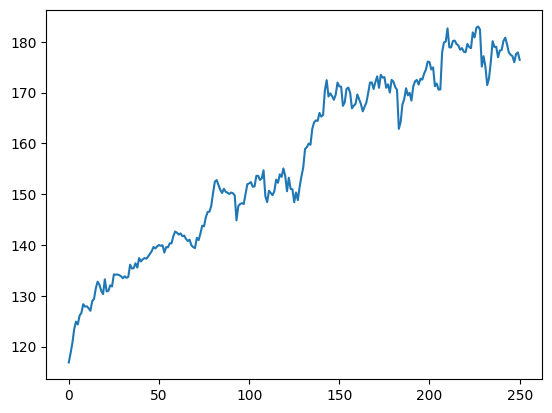

In [ ]:
df['Close'].plot(); # 終値の可視化

In [ ]:
df.head() # 先頭 5 行の確認


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [ ]:
data = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
# インスタンス化
model = Prophet()
# 学習
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -2.4324


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       897.433    0.00854162        180.56           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181        899.44   0.000118371       210.926   4.726e-07       0.001      278  LS failed, Hessian reset 
     199       899.984     0.0005241       104.773           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       902.372   0.000235367       222.688   1.952e-06       0.001      446  LS failed, Hessian reset 
     299       902.778   0.000445283        282.55      0.3056      0.3056      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        903.81   6.67893e-06       67.8772      0.6118      0.6118      587   
    Iter      log prob        ||dx||      ||grad||       alph

In [ ]:
# 学習データに基づいて未来を予測
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

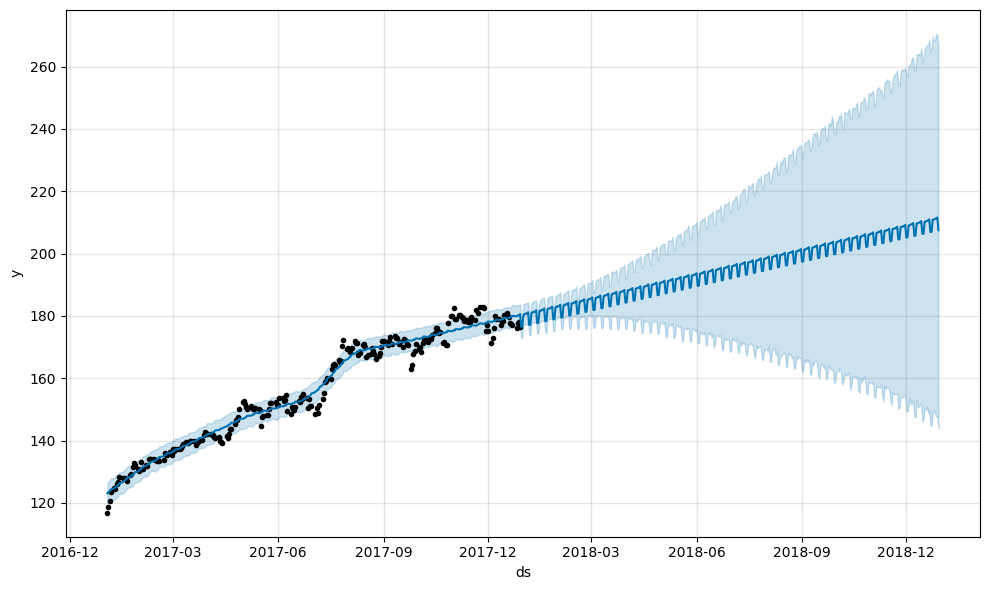

In [ ]:
# 予測結果の可視化
model.plot(forecast)
plt.show()
#2017年のデータを用いて2018年の株価の予想をした

In [ ]:
forecast = forecast.reset_index().rename(columns={'ds': 'Date', 'yhat': 'fClose'})

In [ ]:
x=0
d3 = date(2018, 1, 1)
d3 = d3.strftime("%Y-%m-%d")
start_date = d3

df3 = yf.download('META', 
                      start=start_date, 
                      end=date(2019, 1, 1), 
                      progress=False)
df3["Date"] = df3.index
df3 = df3[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
df3.reset_index(drop=True, inplace=True)
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
1,2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2,2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
3,2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
4,2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700
...,...,...,...,...,...,...,...
246,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
247,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
248,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
249,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600


In [ ]:
df4=pd.merge(forecast, df3, on="Date", how="inner")

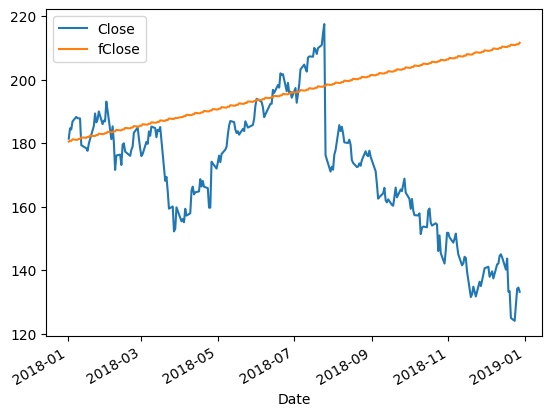

In [ ]:
df_subset = df4[['Date', 'Close', 'fClose']]
df_subset.plot(x='Date', y=['Close', 'fClose'])
plt.show()
#fclose=2018年から2019までの株価の予測値
#Close＝実際の株価の値

### 予測値の評価

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(df4['Close'], df4['fClose'])
mae
#MAE：実際のデータとの差の絶対値の平均

26.60109242067543

In [ ]:
r2 = r2_score(df4['Close'], df4['fClose'])
r2
#決定係数(Coefficient of determination)は-2,24。

-2.241590876338176

In [ ]:
x=0
d2 = date(2016, 1, 1)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df = yf.download('META', 
                      start=start_date, 
                      end=date(2021, 1, 1), 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
df

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89c9e0e4-c204-4f7f-ad6a-129a4757f613' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>